<a href="https://www.kaggle.com/code/sharmageetika/decision-tree?scriptVersionId=102207764" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-purchase-decision-dataset/car_data.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("../input/cars-purchase-decision-dataset/car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
#check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


***EXPLONATORY DATA ANALYSIS***

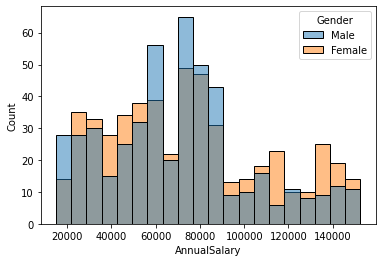

In [6]:
sns.histplot(x='AnnualSalary', data=df, hue='Gender', bins=20)
plt.show()

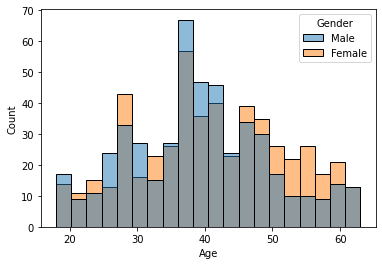

In [7]:
sns.histplot(x='Age', data=df, hue='Gender', bins=20)
plt.show()

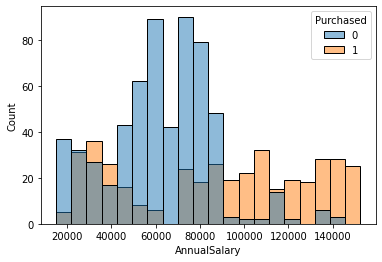

In [8]:
sns.histplot(x='AnnualSalary', data=df, hue='Purchased', bins=20)
plt.show()

'This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of \nplots and the diagonal plots are the univariate plots.'

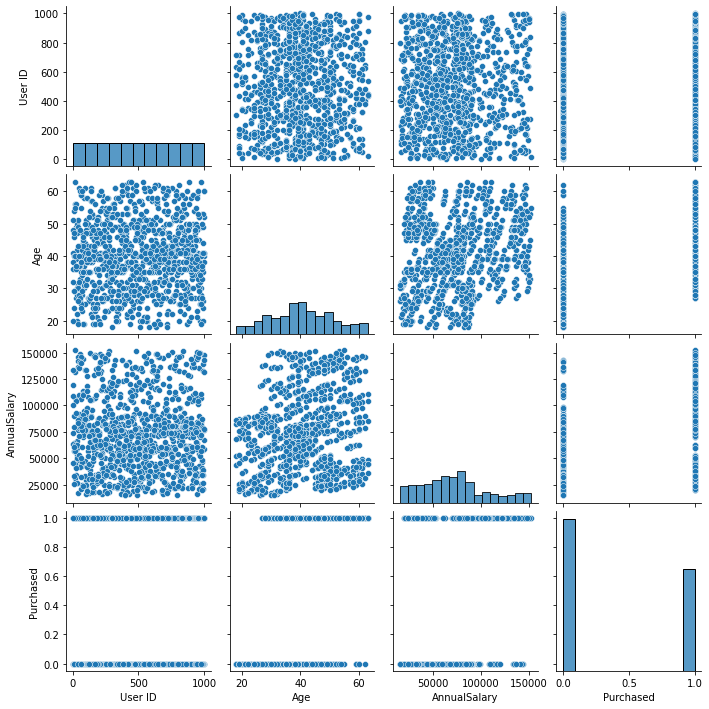

In [9]:
sns.pairplot(df)
plt.plot()
'''This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of 
plots and the diagonal plots are the univariate plots.'''

[]

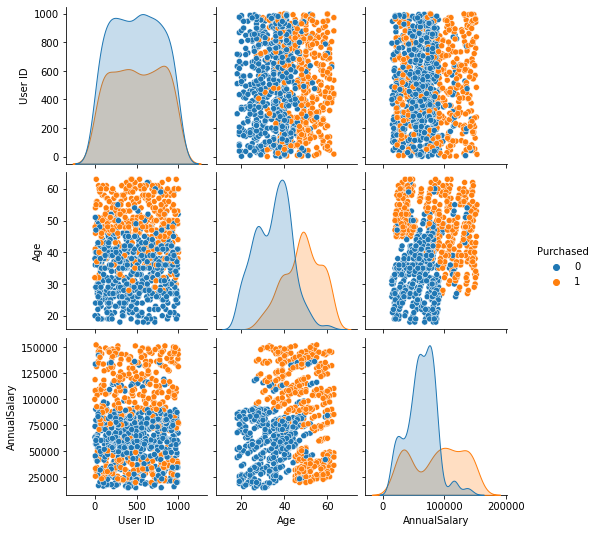

In [10]:
sns.pairplot(df,hue='Purchased')
plt.plot()

<AxesSubplot:>

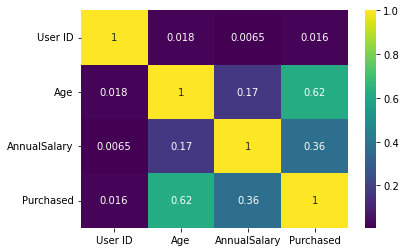

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

# Conclusion: 
There is relation between Age and Purchase decision, the people chances of person older than 40 years buying a car is higher.\
People with higher salary tends to buy more

In [12]:
# Convert categorical data (Gender) to numeric data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


In [13]:
#Since User ID does not decide wether the preson is going to buy a care or not, hence it is redundant: drop it
df=df.drop('User ID', axis=1)
df

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


# Decision Tree Model

In [14]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 42)

In [15]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)

In [16]:
y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.8833333333333333


In [17]:
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       172
           1       0.88      0.84      0.86       128

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



[[157  15]
 [ 20 108]]
